In [2]:
import pandas
df = pandas.read_csv(r'C:\\machine.csv')
print(df)

        vendor            model  MYCT   MMIN   MMAX  CACH  CHMIN  CHMAX   PRP  \
0      adviser            32/60   125    256   6000   256     16    128   198   
1       amdahl           470v/7    29   8000  32000    32      8     32   269   
2       amdahl          470v/7a    29   8000  32000    32      8     32   220   
3       amdahl          470v/7b    29   8000  32000    32      8     32   172   
4       amdahl          470v/7c    29   8000  16000    32      8     16   132   
5       amdahl           470v/b    26   8000  32000    64      8     32   318   
6       amdahl         580-5840    23  16000  32000    64     16     32   367   
7       amdahl         580-5850    23  16000  32000    64     16     32   489   
8       amdahl         580-5860    23  16000  64000    64     16     32   636   
9       amdahl         580-5880    23  32000  64000   128     32     64  1144   
10      apollo            dn320   400   1000   3000     0      1      2    38   
11      apollo            dn

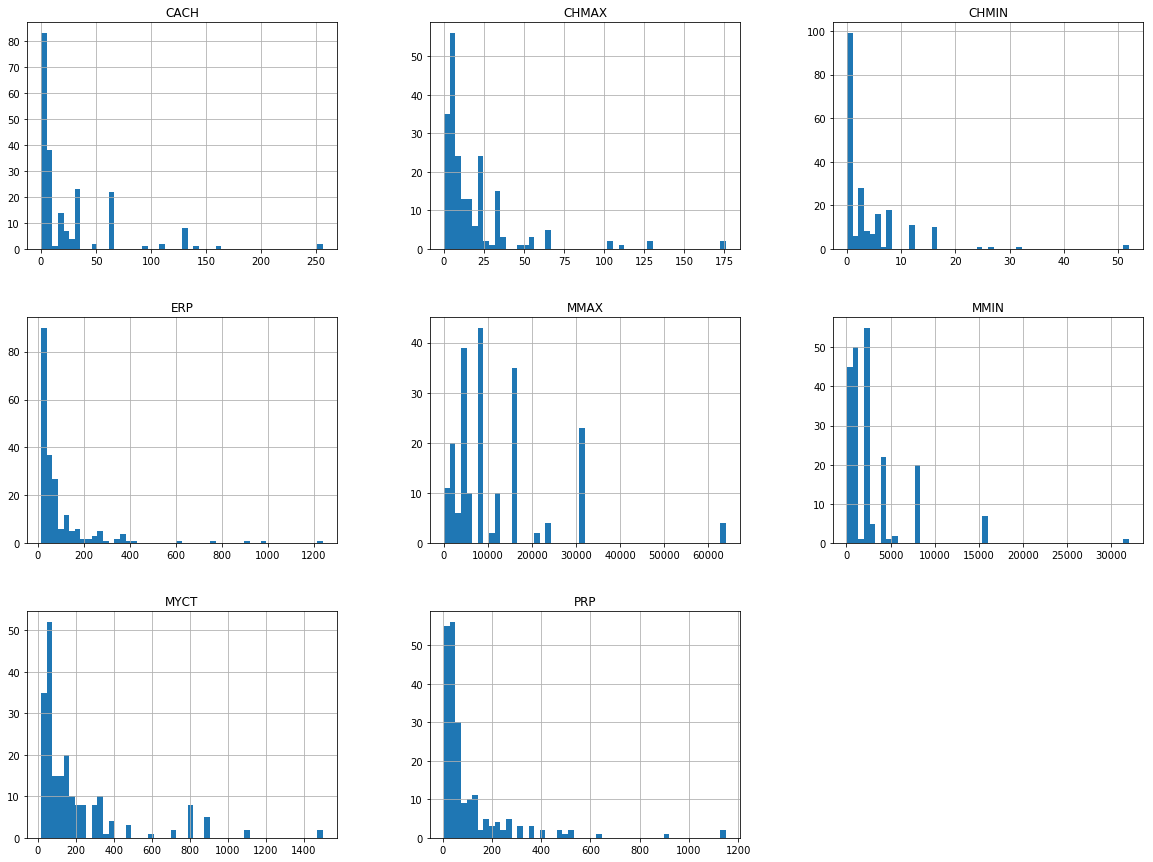

In [3]:
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001853534E0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000185369B6550>]], dtype=object)

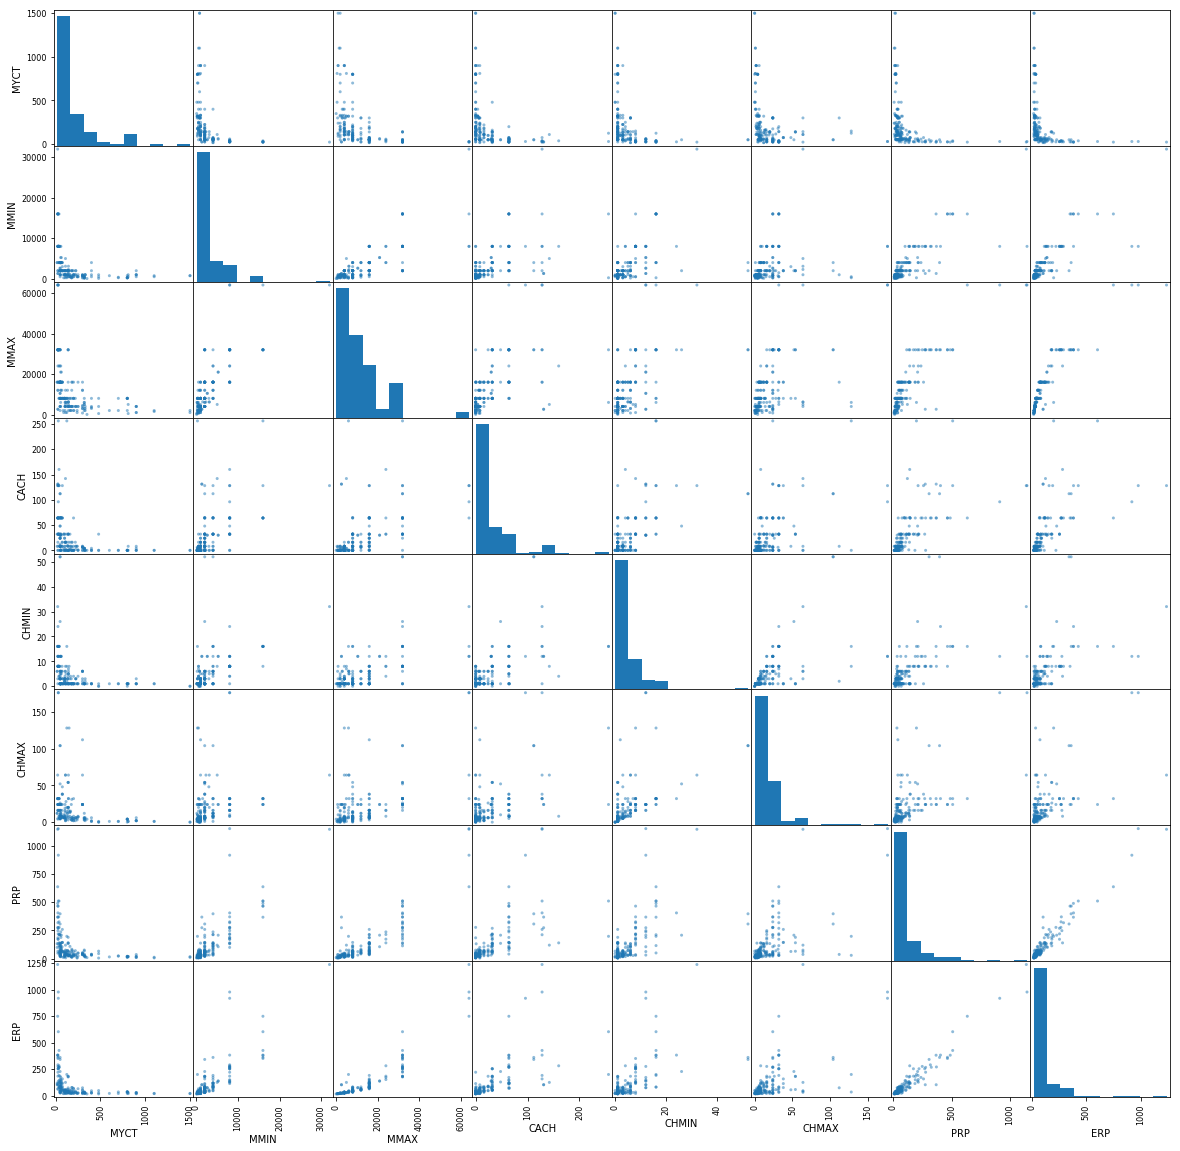

In [4]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20))

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

print(df['vendor'])
enc = LabelEncoder()
enc.fit(df['vendor'])
df['vendor'] = enc.transform(df['vendor'])
print(df['vendor'])

train, test = train_test_split(df, test_size=0.2)

X_train = train[['vendor','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]
y_train = train['ERP']

X_test = test[['vendor','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]
y_test = test['ERP']

#from sklearn import preprocessing
#X_train = preprocessing.normalize(X_train, norm = 'l2')
#X_test = preprocessing.normalize(X_test, norm = 'l2')
#print(X_train)



0        adviser
1         amdahl
2         amdahl
3         amdahl
4         amdahl
5         amdahl
6         amdahl
7         amdahl
8         amdahl
9         amdahl
10        apollo
11        apollo
12          basf
13          basf
14           bti
15           bti
16     burroughs
17     burroughs
18     burroughs
19     burroughs
20     burroughs
21     burroughs
22     burroughs
23     burroughs
24         c.r.d
25         c.r.d
26         c.r.d
27         c.r.d
28         c.r.d
29         c.r.d
         ...    
179        prime
180        prime
181      siemens
182      siemens
183      siemens
184      siemens
185      siemens
186      siemens
187      siemens
188      siemens
189      siemens
190      siemens
191      siemens
192      siemens
193       sperry
194       sperry
195       sperry
196       sperry
197       sperry
198       sperry
199       sperry
200       sperry
201       sperry
202       sperry
203       sperry
204       sperry
205       sperry
206       srat

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLars, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 0.5)
ridge_reg = ridge_reg.fit(X_train, y_train)
 
lasso = Lasso(alpha = 0.1)
lasso = lasso.fit(X_train, y_train)

lassoLars = LassoLars(alpha = 0.1)
lassoLars = lassoLars.fit(X_train, y_train)

bayesianRidge = BayesianRidge()
bayesianRidge = bayesianRidge.fit(X_train, y_train)

poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly = poly.fit(X_train, y_train)

decisionTree = DecisionTreeRegressor(max_depth=None)
decisionTree = decisionTree.fit(X_train, y_train)

bagging = BaggingRegressor(base_estimator=None, n_estimators=10)
bagging.fit(X_train, y_train)

randomForest = RandomForestRegressor(max_depth=None, criterion="mse")
randomForest = randomForest.fit(X_train, y_train)

gradientBoosting = GradientBoostingRegressor(random_state=0)
gradientBoosting = gradientBoosting.fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh = neigh.fit(X_train, y_train)

svr_rbf = SVR(kernel='rbf', C=100, gamma='auto', epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

svr_rbf = svr_rbf.fit(X_train, y_train)
print("rbf done")
svr_lin = svr_lin.fit(X_train, y_train)
print("lin done")

ada_boost = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_boost.fit(X_test, y_test)
#svr_poly = svr_poly.fit(X_train, y_train)
#print("poly done")


rbf done
lin done


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=0)

In [7]:
print('Linear regression: '+ str(lin_reg.score(X_test, y_test)))
print('Ridge regression: '+ str(ridge_reg.score(X_test, y_test)))
print('Lasso: ' + str(lasso.score(X_test,y_test)))
print('LassoLars: ' + str(lassoLars.score(X_test, y_test)))
print('BayesianRidge: ' + str(bayesianRidge.score(X_test, y_test)))
print('Polynomial regression: ' + str(poly.score(X_test, y_test)))
print('Decision Tree: '+ str(decisionTree.score(X_test,y_test)))
print('Bagging: '+ str(bagging.score(X_test,y_test)))
print('Random Forest: '+ str(randomForest.score(X_test,y_test)))
print('Gradient Boosting: '+ str(gradientBoosting.score(X_test,y_test)))
print('KNeighbors: '+ str(neigh.score(X_test,y_test)))
print('SVR with radial kernel function: ' + str(svr_rbf.score(X_test, y_test)))
print('SVR with linear kernel function: ' + str(svr_lin.score(X_test, y_test)))
print('Ada Boost: ' + str(ada_boost.score(X_test, y_test)))
#print('SVR with polynomial kernel function: ' + str(svr_poly.score(X_test, y_test)))

Linear regression: 0.915251645249
Ridge regression: 0.915251848995
Lasso: 0.91526801337
LassoLars: 0.91385968007
BayesianRidge: 0.915760624653
Polynomial regression: 0.999525049118
Decision Tree: 0.9295771075
Bagging: 0.820553006211
Random Forest: 0.838921546403
Gradient Boosting: 0.885823389022
KNeighbors: 0.879972435777
SVR with radial kernel function: -0.0560520515203
SVR with linear kernel function: -758.786988286
Ada Boost: 0.996177195297


In [8]:
poly.predict(X_test)

array([   44.72233907,    42.97390769,    37.36560311,    64.86568645,
          19.441255  ,   134.26986542,    86.64214151,    93.89082126,
          37.25476146,   119.67622155,   118.42564057,   157.03546122,
          18.9372524 ,    90.72320336,    23.73904372,   108.8144788 ,
         601.12210534,    41.85606853,    38.15001385,    30.63169593,
          33.224526  ,    16.7833763 ,    30.62219486,    76.36869563,
          19.38075263,    26.81942381,    21.00733466,    46.48749959,
          33.32260727,   274.87115172,    21.72941673,    35.04714464,
          22.49162542,    81.26234854,    20.30658043,   383.54131776,
          19.75059863,    31.71595018,   326.10668068,   224.49937021,
        1228.79585794,    44.66398863])

In [9]:
print(y_test)

126      44
179      43
53       36
172      67
25       21
167     142
143      86
31      102
49       38
147     119
19      124
65      157
66       18
120     101
80       23
64      113
156     603
40       41
131      37
113      31
160      35
14       15
92       32
115      76
181      19
76       27
67       20
70       47
61       34
5       290
182      22
101      35
18       22
129      82
124      20
6       381
62       19
54       30
196     341
97      220
9      1238
162      47
Name: ERP, dtype: int64


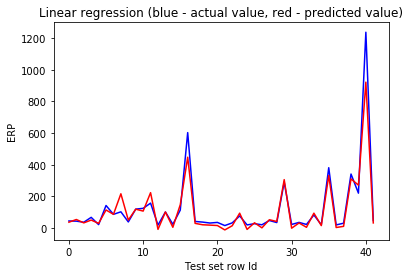

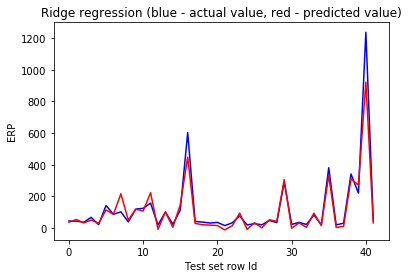

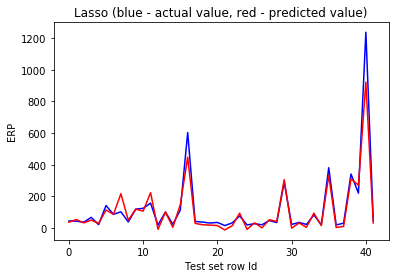

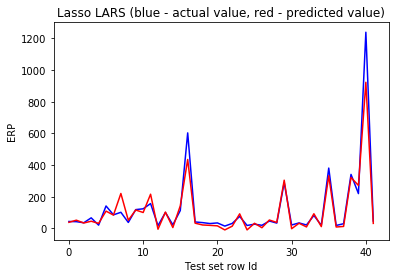

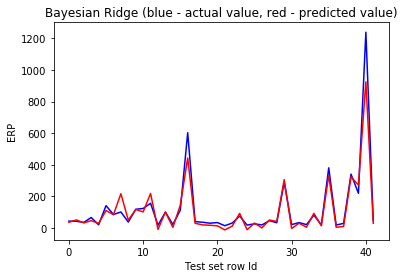

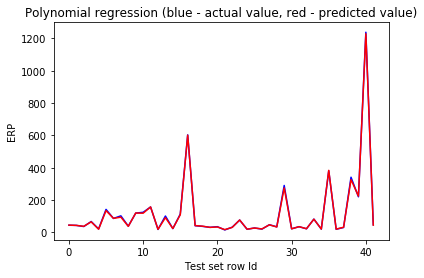

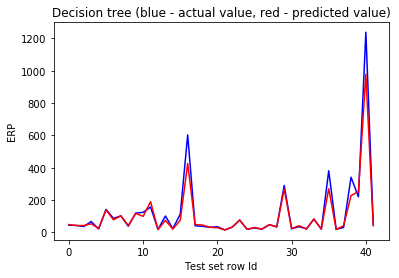

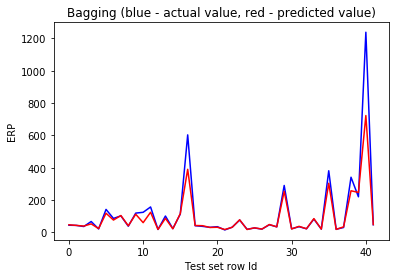

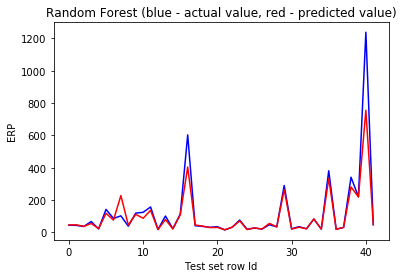

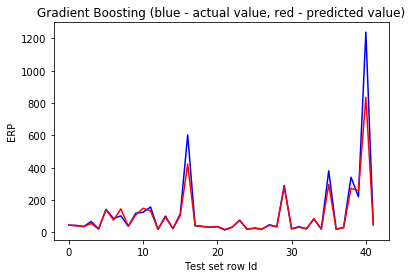

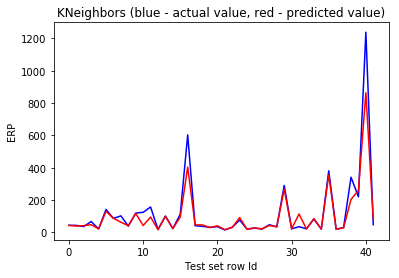

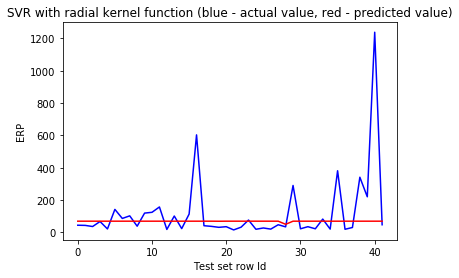

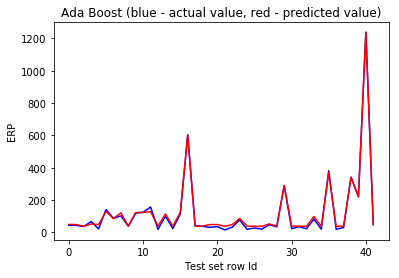

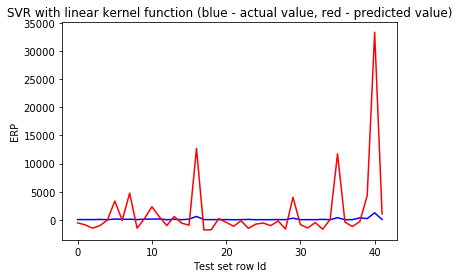

In [10]:
#Results Visualization
import matplotlib.pyplot as plt
rowIds = []
for i in range(42):
    rowIds.append(i)

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, lin_reg.predict(X_test), color = "red")
plt.title("Linear regression (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, ridge_reg.predict(X_test), color = "red")
plt.title("Ridge regression (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, lasso.predict(X_test), color = "red")
plt.title("Lasso (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, lassoLars.predict(X_test), color = "red")
plt.title("Lasso LARS (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, bayesianRidge.predict(X_test), color = "red")
plt.title("Bayesian Ridge (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, poly.predict(X_test), color = "red")
plt.title("Polynomial regression (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, decisionTree.predict(X_test), color = "red")
plt.title("Decision tree (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, bagging.predict(X_test), color = "red")
plt.title("Bagging (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, randomForest.predict(X_test), color = "red")
plt.title("Random Forest (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, gradientBoosting.predict(X_test), color = "red")
plt.title("Gradient Boosting (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, neigh.predict(X_test), color = "red")
plt.title("KNeighbors (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, svr_rbf.predict(X_test), color = "red")
plt.title("SVR with radial kernel function (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, ada_boost.predict(X_test), color = "red")
plt.title("Ada Boost (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, svr_lin.predict(X_test), color = "red")
plt.title("SVR with linear kernel function (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [18]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 0.5)
ridge_reg = ridge_reg.fit(X_train, y_train)
 
lasso = Lasso(alpha = 0.1)
lasso = lasso.fit(X_train, y_train)

lassoLars = LassoLars(alpha = 0.1)
lassoLars = lassoLars.fit(X_train, y_train)

bayesianRidge = BayesianRidge()
bayesianRidge = bayesianRidge.fit(X_train, y_train)

poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly = poly.fit(X_train, y_train)

decisionTree = DecisionTreeRegressor(max_depth=None)
decisionTree = decisionTree.fit(X_train, y_train)

bagging = BaggingRegressor(base_estimator=None, n_estimators=10)
bagging.fit(X_train, y_train)

randomForest = RandomForestRegressor(max_depth=None, criterion="mse")
randomForest = randomForest.fit(X_train, y_train)

gradientBoosting = GradientBoostingRegressor(random_state=0)
gradientBoosting = gradientBoosting.fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh = neigh.fit(X_train, y_train)

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

svr_rbf = svr_rbf.fit(X_train, y_train)
svr_lin = svr_lin.fit(X_train, y_train)

ada_boost = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_boost.fit(X_test, y_test)
#svr_poly = svr_poly.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=0)

In [19]:
print('Linear regression: '+ str(lin_reg.score(X_test, y_test)))
print('Ridge regression: '+ str(ridge_reg.score(X_test, y_test)))
print('Lasso: ' + str(lasso.score(X_test,y_test)))
print('LassoLars: ' + str(lassoLars.score(X_test, y_test)))
print('BayesianRidge: ' + str(bayesianRidge.score(X_test, y_test)))
print('Polynomial regression: ' + str(poly.score(X_test, y_test)))
print('Decision Tree: '+ str(decisionTree.score(X_test,y_test)))
print('Bagging: '+ str(bagging.score(X_test,y_test)))
print('Random Forest: '+ str(randomForest.score(X_test,y_test)))
print('Gradient Boosting: '+ str(gradientBoosting.score(X_test,y_test)))
print('KNeighbors: '+ str(neigh.score(X_test,y_test)))
print('SVR with radial kernel function: ' + str(svr_rbf.score(X_test, y_test)))
print('SVR with linear kernel function: ' + str(svr_lin.score(X_test, y_test)))
print('Ada Boost: ' + str(ada_boost.score(X_test, y_test)))
#print('SVR with polynomial kernel function: ' + str(svr_poly.score(X_test, y_test)))

Linear regression: 0.918745275905
Ridge regression: 0.880296837235
Lasso: 0.918968140754
LassoLars: 0.918855864748
BayesianRidge: 0.917534456476
Polynomial regression: 0.930785057142
Decision Tree: 0.916384925441
Bagging: 0.883394334087
Random Forest: 0.840885239566
Gradient Boosting: 0.911246134143
KNeighbors: 0.697624333158
SVR with radial kernel function: 0.590416859638
SVR with linear kernel function: 0.790230373513
Ada Boost: 0.996177195297
